## Simulaciones de eventos aleatorios ##

## 1. Simulación de un dado ##

Es posible simular números aleatorios con una computadora

In [148]:
import random
random.random()

0.8548155739877676

Esto permite simular experimentos de naturaleza aleatoria.  Los valores posibles de un dado son:

In [149]:
dado = [1, 2, 3, 4, 5, 6]

Tirar el dado:

In [150]:
import numpy as np

Tirar el dado una vez:

In [158]:
y = np.random.choice(dado)
print(y)

6


Tirar el dado 100 veces:

In [175]:
y = np.random.choice(dado, 100, replace=True)
y

array([1, 1, 1, 2, 6, 2, 6, 5, 6, 6, 5, 6, 1, 4, 6, 3, 6, 4, 3, 3, 3, 1,
       3, 3, 6, 5, 3, 6, 4, 6, 5, 2, 4, 4, 6, 3, 6, 4, 3, 6, 2, 1, 4, 4,
       6, 6, 1, 4, 6, 2, 2, 5, 6, 2, 3, 1, 5, 3, 1, 1, 1, 2, 2, 1, 6, 3,
       1, 3, 3, 1, 6, 2, 5, 3, 2, 3, 6, 1, 5, 4, 5, 5, 1, 1, 1, 5, 3, 6,
       5, 6, 3, 1, 3, 2, 3, 5, 4, 3, 1, 1])

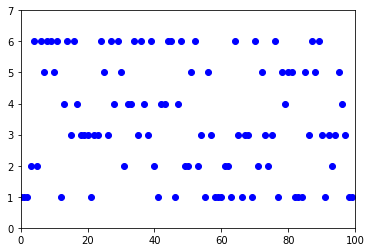

In [176]:
import matplotlib.pyplot as plt
plt.plot(y, 'bo')
plt.axis([0, 100, 0, 7])
plt.show()

contar la fraccion de veces que sale, por ejemplo, el 3:

In [238]:
z = []
k = 3
N = 10000
cont = 0

for i in range(N):
    y = np.random.choice(dado, 1)
    if y[0] == k: cont+=1
    z.append(float(cont)/float(i+1))    

In [239]:
print(f'De los {N} experimentos, salió el {k}: {cont} veces (una fracción de {cont/N})')

De los 10000 experimentos, salió el 3: 1661 veces (una fracción de 0.1661)


In [240]:
1./6.

0.16666666666666666

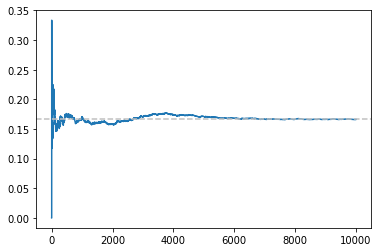

In [241]:
plt.plot(z[0:10000])
plt.axhline(1/6, linestyle='--', color='silver')

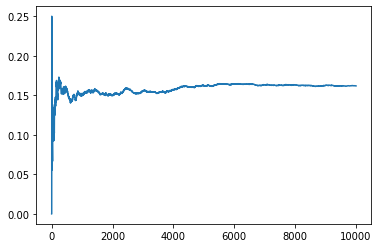

In [93]:
plt.plot(z)
plt.show()

## 2. Pensando números ##

Calculemos los valores medios de submuestras elegidas al azar de un conjunto cualquiera de números

In [244]:
x = [12,65,37,48,4,76,91,1,10,15,28,64]
Ns = 5

In [248]:
import numpy as np
y = np.random.choice(x, Ns)
y.sum()/float(Ns)

24.4

In [249]:
p = []
for i in range(100000):
    y = np.random.choice(x, Ns)    
    p.append(y.sum()/float(Ns))

In [250]:
np.mean(p)

37.54619999999999

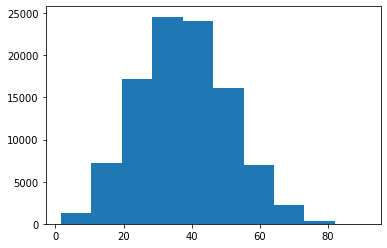

In [251]:
plt.hist(p)
plt.show()

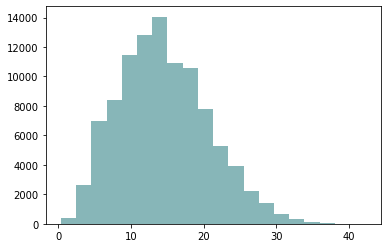

In [30]:
plt.hist(p, 20, facecolor='cadetblue', alpha=0.75)
plt.show()

In [32]:
print(np.mean(x))
print(np.mean(p))

14.5
14.513998000000003


## 3. Motociclista suicida ##

Un motociclista cruza por las esquinas sin frenar.  Supongamos que la probabilidad de que tenga un accidente es de 0.23

In [253]:
p = 0.23

Cuántas cuadras puede hacer antes de tener un accidente?

In [261]:
import random
n = 0
while True:
    x = random.random()
    if x>p: 
        n = n + 1
    else:
        break
n

9

In [262]:
q = []

for i in range(1000):

    n = 0
    while True:
        x = random.random()
        if x>p: 
            n = n + 1
        else:
            break
    q.append(n)

In [265]:
Nmax = 25
c = [0]*Nmax
for i in range(Nmax):
    c[i] = q.count(i)
    

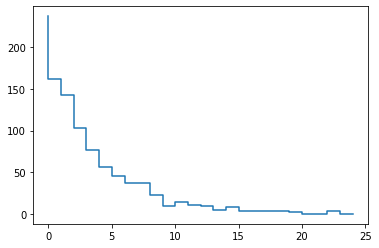

In [266]:
import matplotlib.pyplot as plt
plt.step(range(Nmax), c)
plt.show()

In [267]:
import scipy.stats as std

In [268]:
n = 100
p = 0.23

std.binom.ppf(0.3, n, p)

21.0

In [269]:
x = np.arange(std.geom.ppf(0.0001, p), std.geom.ppf(0.999, p))

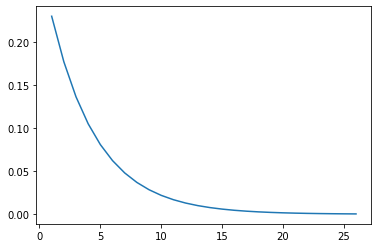

In [270]:
plt.plot(x, std.geom.pmf(x, p))
plt.show()

Text(0, 0.5, 'frecuencia')

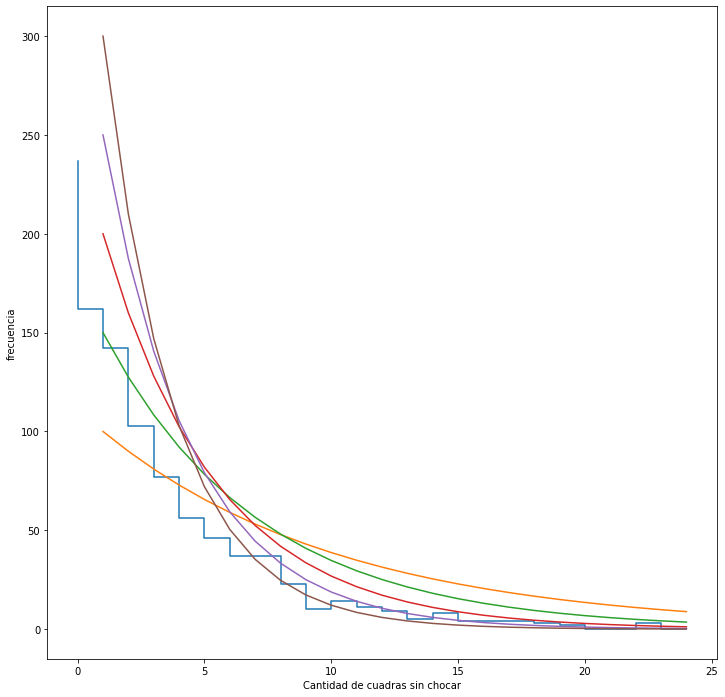

In [271]:
x = range(Nmax)

p = 0.23

fig, ax = plt.subplots(figsize=(12, 12))
ax.step(x, c)
for p in [0.1, 0.15, 0.2, 0.25, 0.3]:
    y = 1000*std.geom.pmf(x, p)
    ax.plot(x[1:], y[1:])

ax.set_xlabel('Cantidad de cuadras sin chocar')
ax.set_ylabel('frecuencia')